In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import scipy.stats as st
import matplotlib
from tqdm import tqdm
import pickle
import scipy
from scipy.optimize import curve_fit
from derivative_decay import *
import IPython

Using TensorFlow backend.


Initialized TensorFlow


In [2]:
# dimensions to try
Ns = [int(t) for t in np.linspace(100, 400, 7)]

# how much repetitions for each experiment are needed?
repetitions = 5

print('Sizes', Ns)
print('Repetitions', repetitions)
print('Total runs', len(Ns) * repetitions)

Sizes [100, 150, 200, 250, 300, 350, 400]
Repetitions 5
Total runs 35


In [3]:
# list of things to compute for each experiment
to_run = [mean_d2Ldy2, partial(mean_dLdy, irange = range(404)), dataset_metrics, W_inf_norm]
# parameters for each experiment
parameters = {'reg_coeff': 0, 'reg_type': None, 'do_print': 'plot', 'epochs': 1000,
             'experiment': BostonHousingExperiment}

  0%|          | 0/7 [00:00<?, ?it/s]

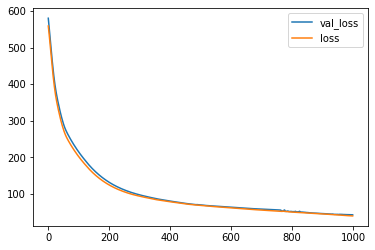

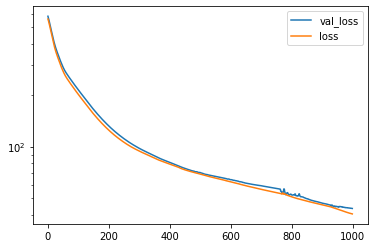

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 43.50215530395508, 'train_loss': 40.4215087890625}


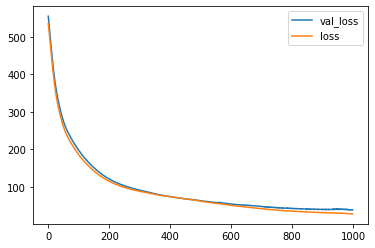

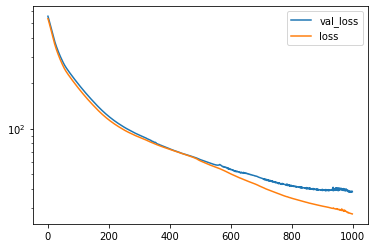

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 38.21852111816406, 'train_loss': 27.239423751831055}


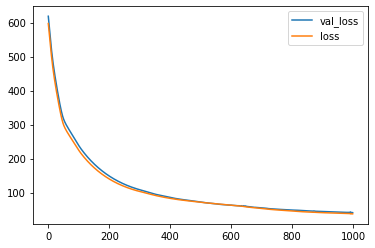

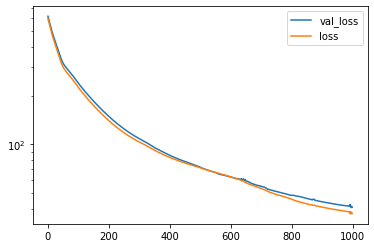

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 40.84492874145508, 'train_loss': 37.39492416381836}


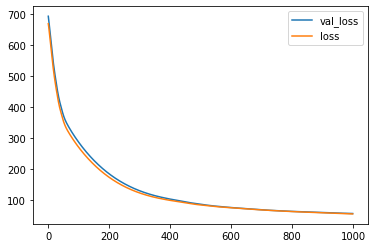

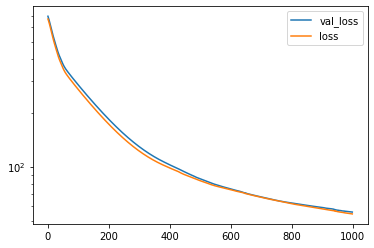

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 55.74321365356445, 'train_loss': 54.430721282958984}


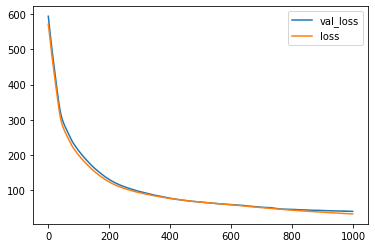

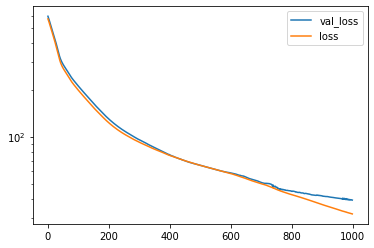

 14%|█▍        | 1/7 [00:21<02:07, 21.33s/it]

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 39.166015625, 'train_loss': 31.910686492919922}


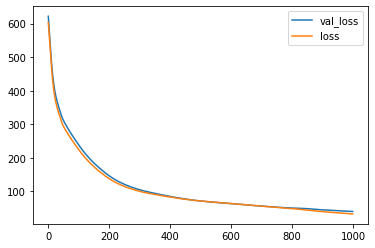

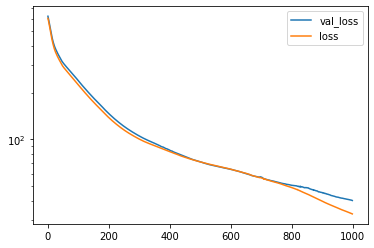

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 40.326473236083984, 'train_loss': 33.042083740234375}


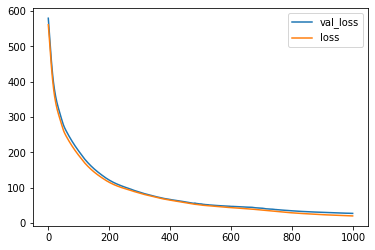

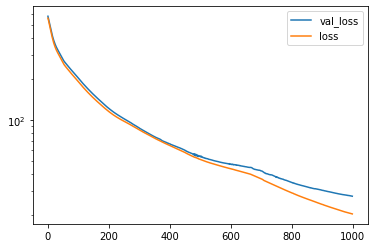

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 27.633365631103516, 'train_loss': 20.48032569885254}


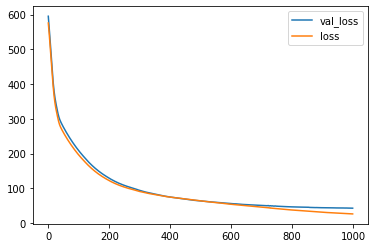

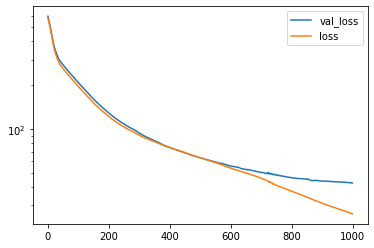

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 42.70273208618164, 'train_loss': 26.18500328063965}


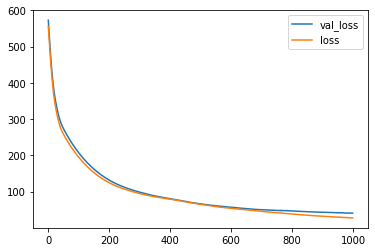

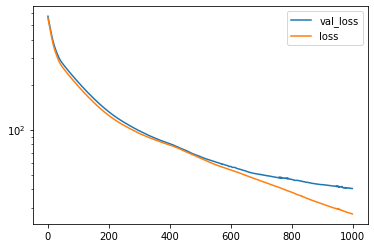

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 40.469295501708984, 'train_loss': 27.393869400024414}


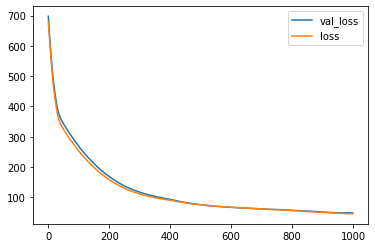

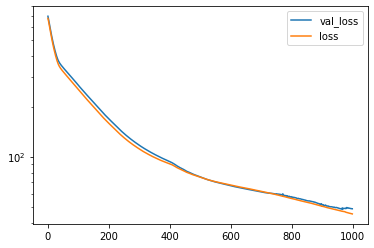

 29%|██▊       | 2/7 [00:43<01:47, 21.52s/it]

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 48.63052749633789, 'train_loss': 45.296241760253906}


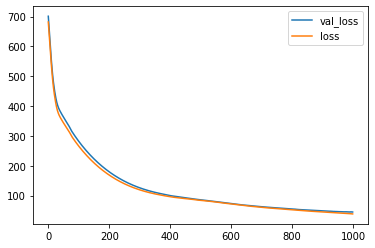

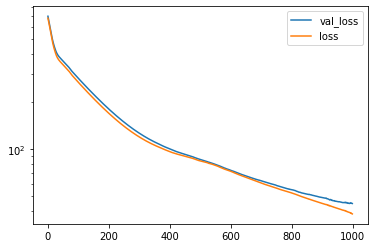

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 44.9632453918457, 'train_loss': 38.59654235839844}


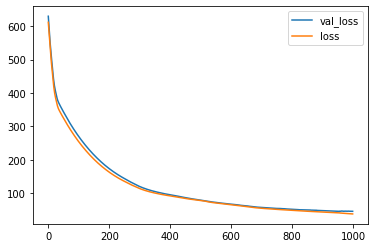

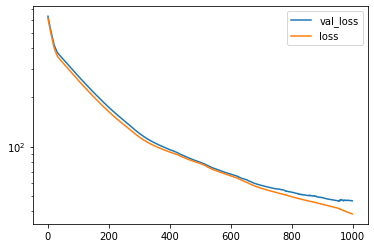

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 46.4682731628418, 'train_loss': 38.655113220214844}


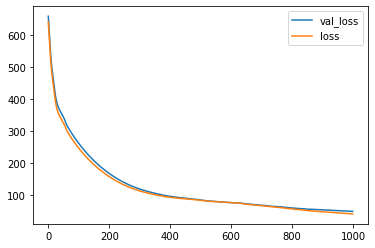

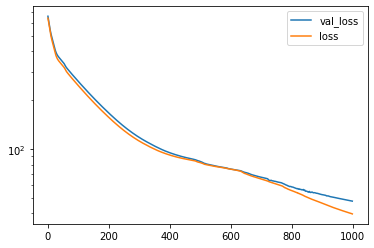

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 47.671512603759766, 'train_loss': 39.7528076171875}


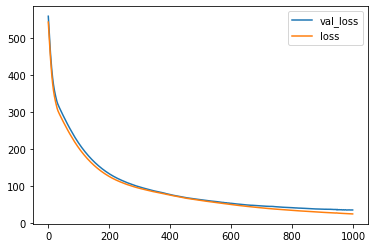

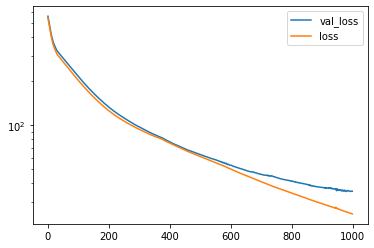

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 35.3949089050293, 'train_loss': 24.743988037109375}


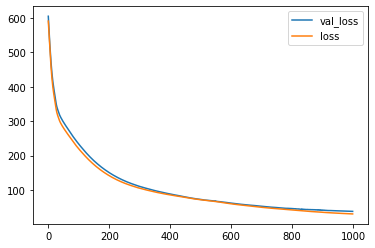

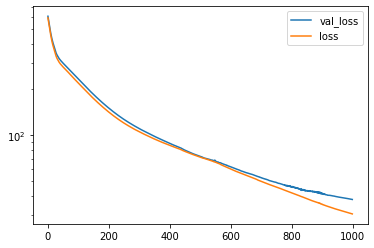

 43%|████▎     | 3/7 [01:03<01:24, 21.22s/it]

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 37.67814254760742, 'train_loss': 30.267892837524414}


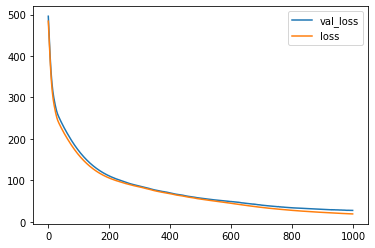

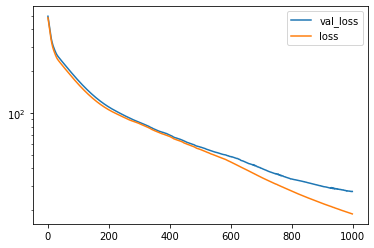

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 27.32222557067871, 'train_loss': 18.859203338623047}


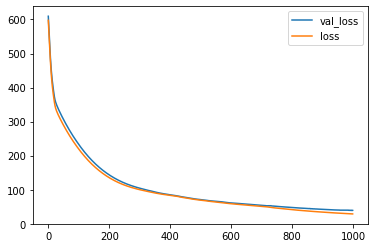

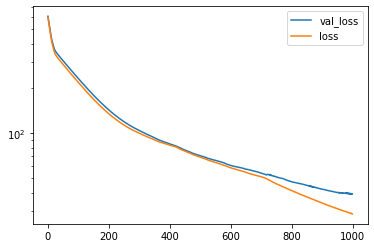

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 39.26430130004883, 'train_loss': 28.850805282592773}


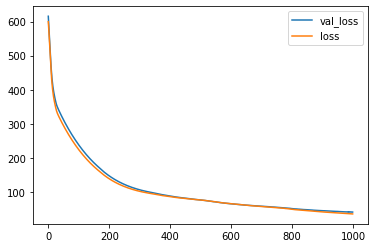

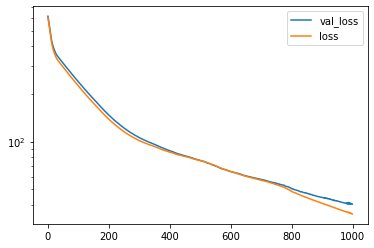

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 40.33665466308594, 'train_loss': 34.97037124633789}


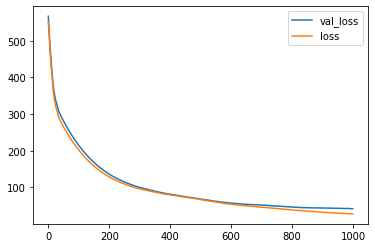

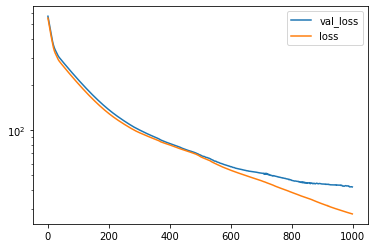

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 41.999305725097656, 'train_loss': 27.835662841796875}


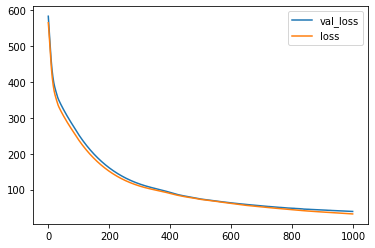

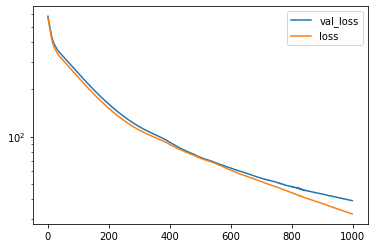

 57%|█████▋    | 4/7 [01:23<01:02, 20.88s/it]

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 39.11933517456055, 'train_loss': 32.207305908203125}


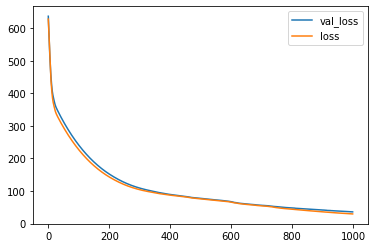

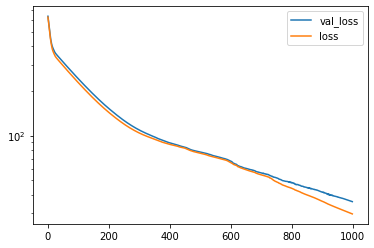

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 35.909908294677734, 'train_loss': 29.68231964111328}


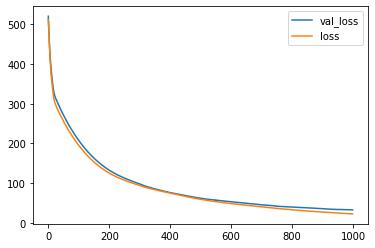

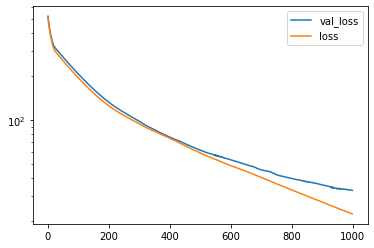

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 32.709205627441406, 'train_loss': 22.489580154418945}


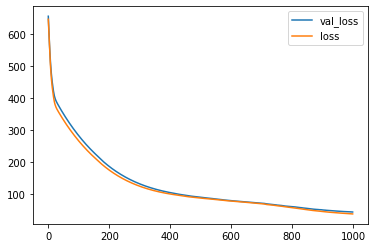

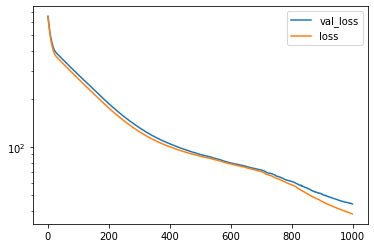

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 44.19109344482422, 'train_loss': 38.27507019042969}


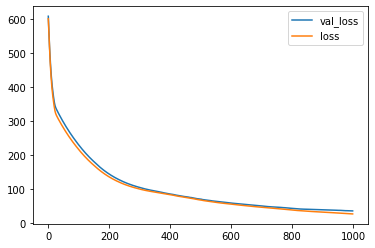

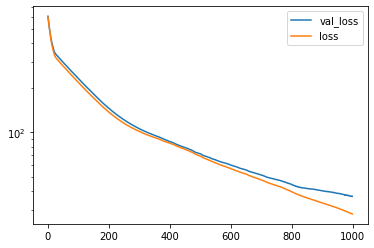

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 36.881591796875, 'train_loss': 28.032894134521484}


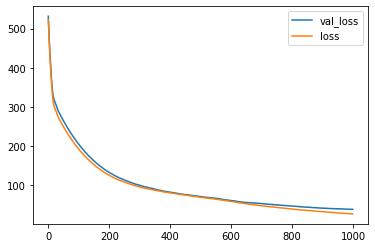

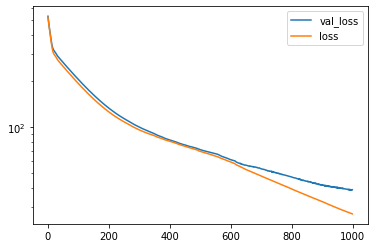

 71%|███████▏  | 5/7 [01:43<00:41, 20.57s/it]

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 38.77533721923828, 'train_loss': 26.94598388671875}


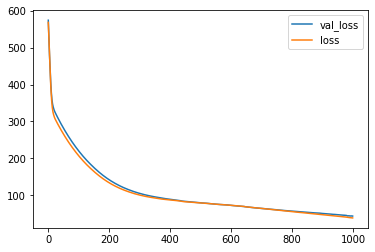

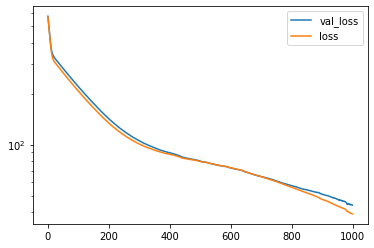

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 43.86956787109375, 'train_loss': 38.94476318359375}


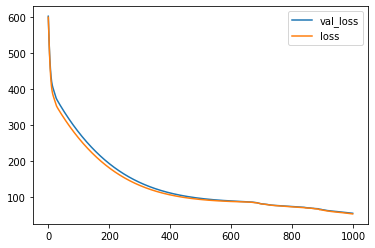

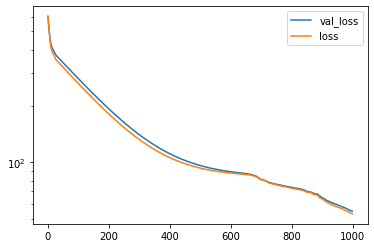

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 54.94957733154297, 'train_loss': 53.130863189697266}


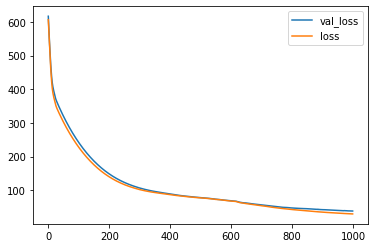

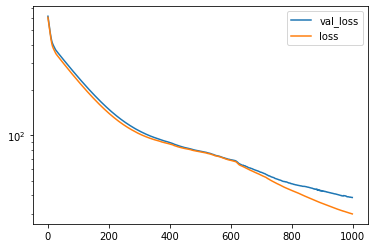

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 38.7036018371582, 'train_loss': 30.119874954223633}


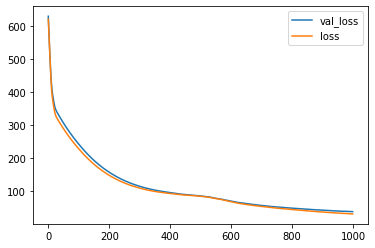

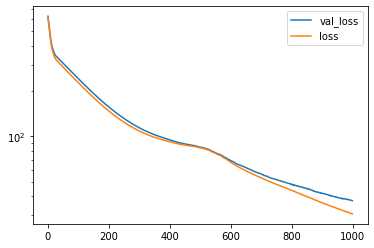

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 37.37533187866211, 'train_loss': 30.523372650146484}


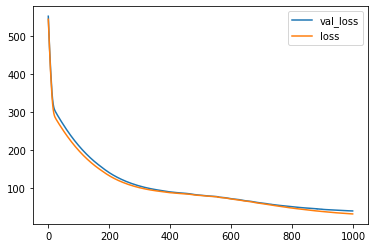

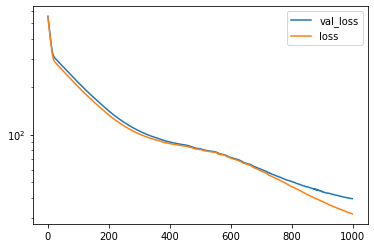

 86%|████████▌ | 6/7 [02:03<00:20, 20.46s/it]

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 39.5675163269043, 'train_loss': 31.748777389526367}


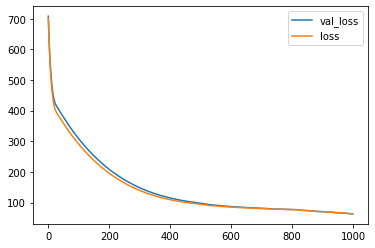

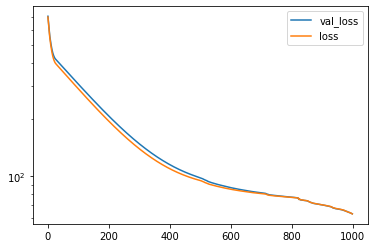

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 62.85450744628906, 'train_loss': 62.762882232666016}


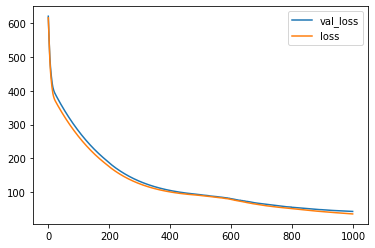

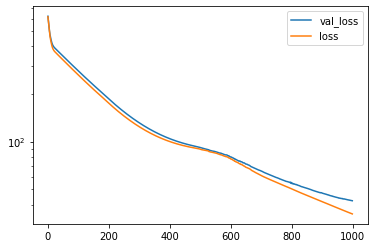

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 42.2817268371582, 'train_loss': 34.89353942871094}


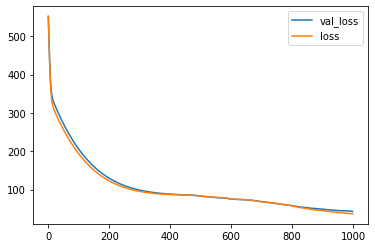

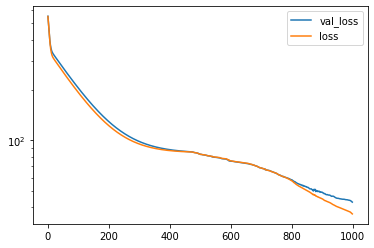

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 42.75201416015625, 'train_loss': 36.35760498046875}


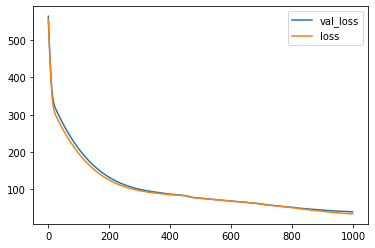

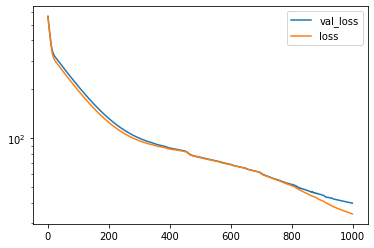

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 39.831329345703125, 'train_loss': 34.18791580200195}


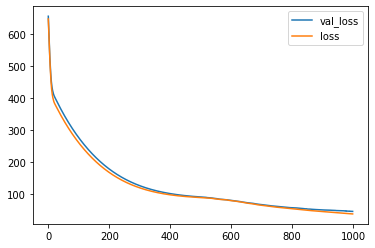

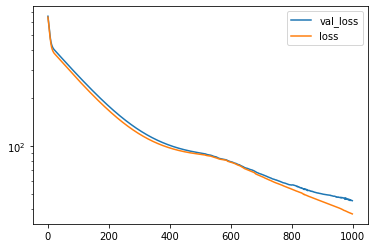

100%|██████████| 7/7 [02:25<00:00, 20.82s/it]

{'val_acc': 1.0, 'train_acc': 1.0, 'val_loss': 45.112831115722656, 'train_loss': 37.23894119262695}


In [4]:
# measuring...
results = get_results(Ns, repetitions, parameters, to_run)

In [5]:
pickle_w(results, "DerivativeWeightDecay-FC-Boston")

In [6]:
# loading results from a file
results = pickle_r("DerivativeWeightDecay-FC-Boston")

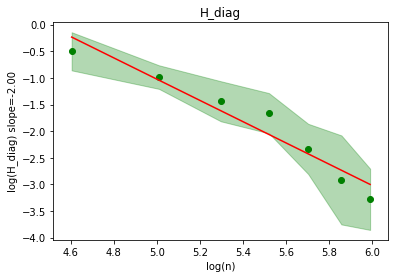

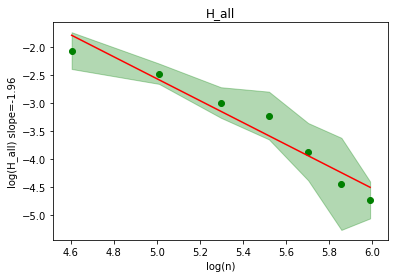

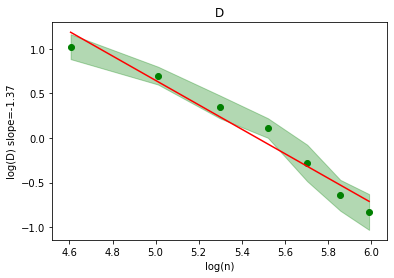

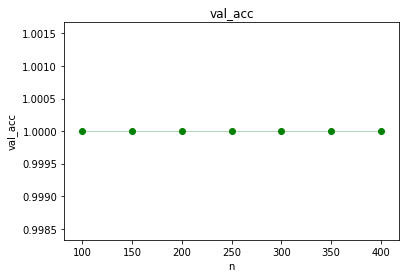

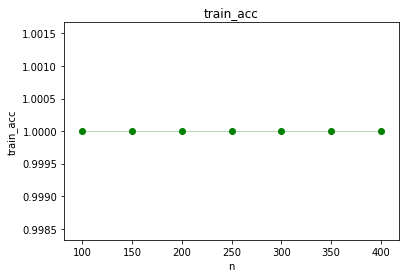

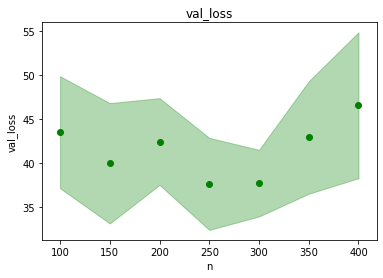

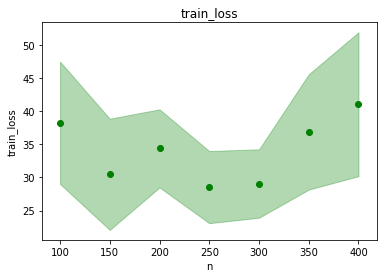

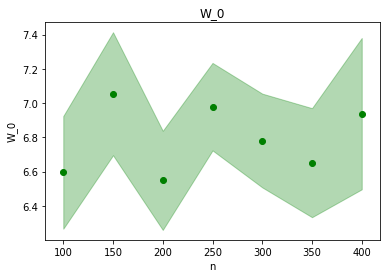

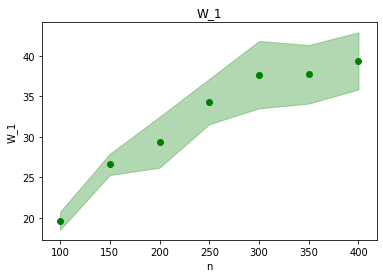

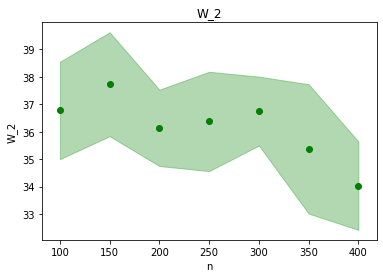

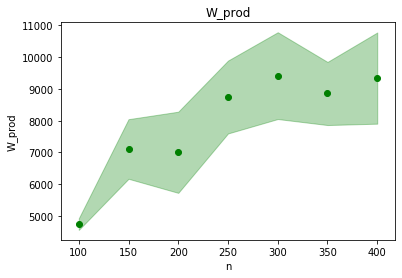

In [7]:
plot_results(Ns, results)

All derivatives decay as they should? Yes, it works for Boston